In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
from tensorflow.keras import models,optimizers,datasets,backend
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [25]:
(xtrain,ytrain),(xtest,ytest) = datasets.cifar10.load_data()

In [26]:
xtrain,xtest = xtrain/255.0,xtest/255.0

In [27]:
xtrain.shape

(50000, 32, 32, 3)

In [28]:
ytrain = tf.keras.utils.to_categorical(ytrain,10)
ytest = tf.keras.utils.to_categorical(ytest,10)

In [35]:
model = models.Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation='relu'),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation='relu'),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ]
)

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [38]:
history = model.fit(xtrain,ytrain,epochs=5,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.2759 - loss: 0.2928 - val_accuracy: 0.4938 - val_loss: 0.2207
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5293 - loss: 0.2086 - val_accuracy: 0.5864 - val_loss: 0.1892
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5992 - loss: 0.1832 - val_accuracy: 0.6112 - val_loss: 0.1780
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6413 - loss: 0.1674 - val_accuracy: 0.6455 - val_loss: 0.1649
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6713 - loss: 0.1545 - val_accuracy: 0.6730 - val_loss: 0.1543


In [39]:
test_loss,test_acc = model.evaluate(xtest,ytest)
print('test loss : ',test_loss)
print('test acc :',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6788 - loss: 0.1526
test loss :  0.15427371859550476
test acc : 0.6729999780654907


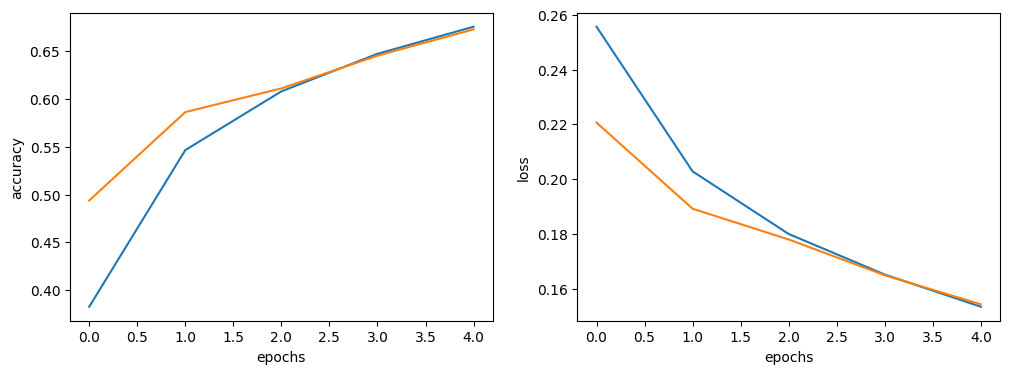

In [41]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [42]:
ytest = np.argmax(ytest,axis=1)
ypred = model.predict(xtest)
ypred = np.argmax(ypred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


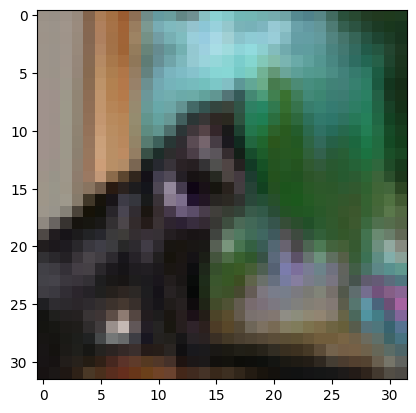

4 4


In [45]:
plt.imshow(xtrain[159])
plt.show()
print(ytest[159],ypred[159])